In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import os
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
all_ratings = pd.read_excel("E:\SCUT-benchmark\SCUT-FBP5500_v2\All_Ratings.xlsx")
image_sources = pd.read_excel("E:\SCUT-benchmark\SCUT-FBP5500_v2\Images_Sources.xlsx")

In [7]:
all_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330000 entries, 0 to 329999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rater            330000 non-null  int64  
 1   Filename         330000 non-null  object 
 2   Rating           330000 non-null  int64  
 3   original Rating  38500 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
all_ratings.head()

,Rater,Filename,Rating,original Rating
0,1,CF1.jpg,3,NaN
1,1,CF10.jpg,3,NaN
2,1,CF100.jpg,1,NaN
3,1,CF101.jpg,2,NaN
4,1,CF102.jpg,3,NaN


In [9]:
image_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Filename               4000 non-null   object
 1   From GuangZhouXiangSu  30 non-null     object
 2   From DataTang          2184 non-null   object
 3   From our laboratory    89 non-null     object
 4   From Internet          1698 non-null   object
 5   Owner's ID             99 non-null     object
dtypes: object(6)
memory usage: 187.6+ KB


In [10]:
image_sources.head()

,Filename,From GuangZhouXiangSu,From DataTang,From our laboratory,From Internet,Owner's ID
0,AF1.jpg,NaN,√,NaN,NaN,NaN
1,AF2.jpg,NaN,NaN,NaN,http://tieba.baidu.com/f?kz=608848418,NaN
2,AF3.jpg,NaN,NaN,NaN,http://www.topit.me/album/1117513,NaN
3,AF4.jpg,NaN,√,NaN,NaN,NaN
4,AF5.jpg,NaN,√,NaN,NaN,NaN


In [11]:
all_ratings[~all_ratings["original Rating"].isnull()]

,Rater,Filename,Rating,original Rating
5500,2,CF1.jpg,4,5.0
5501,2,CF10.jpg,5,5.0
5502,2,CF100.jpg,3,1.0
5503,2,CF101.jpg,3,2.0
5504,2,CF102.jpg,4,4.0
...,...,...,...,...
296995,54,AM995.jpg,2,3.0
296996,54,AM996.jpg,2,2.0
296997,54,AM997.jpg,3,3.0
296998,54,AM998.jpg,3,3.0


In [12]:
print(all_ratings.Filename.nunique())
print(all_ratings.Rater.nunique())

5500
60


In [13]:
train_df = pd.read_csv("train.txt", sep=" ", header=None)
train_df.columns = ['filename','score']
test_df = pd.read_csv("test.txt", sep=" ", header=None)
test_df.columns = ['filename','score']

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  3300 non-null   object 
 1   score     3300 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.7+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  2200 non-null   object 
 1   score     2200 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.5+ KB


In [16]:
image_dir = 'E:\SCUT-benchmark\SCUT-FBP5500_v2\Images'
image_data = []
for image_name in train_df.filename.values:
    if image_name.endswith(("jpg","jpeg","png")):
        img_path = os.path.join(image_dir,image_name)
        img = Image.open(img_path)
        img = img.convert("RGB")
        img = img.resize((100,100))
        img_array = np.array(img).reshape(-1,3).flatten()
        image_data.append(img_array)

train_final = pd.concat((train_df, pd.DataFrame(image_data)), axis=1)

In [17]:
image_dir = 'E:\SCUT-benchmark\SCUT-FBP5500_v2\Images'
image_data = []
for image_name in test_df.filename.values:
    if image_name.endswith(("jpg","jpeg","png")):
        img_path = os.path.join(image_dir,image_name)
        img = Image.open(img_path)
        img = img.convert("RGB")
        img = img.resize((100,100))
        img_array = np.array(img).reshape(-1,3).flatten()
        image_data.append(img_array)

test_final = pd.concat((test_df, pd.DataFrame(image_data)), axis=1)

<Axes: >

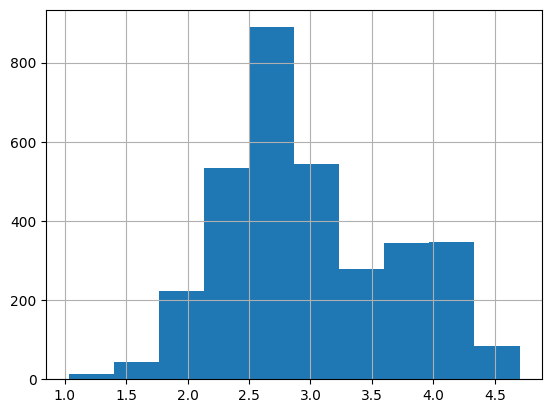

In [18]:
train_final.score.hist()

In [19]:
X_train = np.array(train_final.drop(columns=['filename','score'])).reshape(len(train_final),100,100,3)
y_train = np.array(train_final['score']).reshape(len(train_final),1)

X_test = np.array(test_final.drop(columns=['filename','score'])).reshape(len(test_final),100,100,3)
y_test = np.array(test_final['score']).reshape(len(test_final),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [20]:
print("X_Train:", X_train.shape)
print("Y Train:", y_train.shape)

X_Train: (3300, 100, 100, 3)
Y Train: (3300, 1)


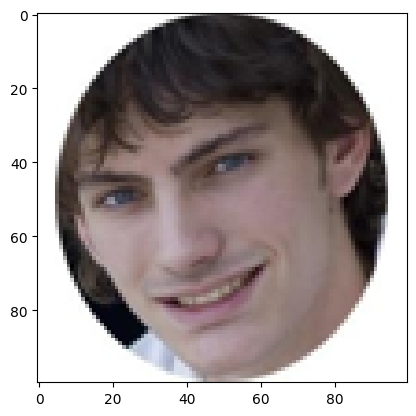

In [21]:
plt.imshow(X_train[0,:])

In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mean_squared_error'] 
)
model.fit(X_train, y_train,validation_split=0.2, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

C:\Users\surya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 3.1073 - mean_squared_error: 3.1073 - val_loss: 0.4002 - val_mean_squared_error: 0.4002
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - loss: 0.3919 - mean_squared_error: 0.3919 - val_loss: 0.3480 - val_mean_squared_error: 0.3480
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - loss: 0.2837 - mean_squared_error: 0.2837 - val_loss: 0.2717 - val_mean_squared_error: 0.2717
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - loss: 0.2458 - mean_squared_error: 0.2458 - val_loss: 0.2570 - val_mean_squared_error: 0.2570
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - loss: 0.2397 - mean_squared_error: 0.2397 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - loss: 0.2131 - mean_squared_error: 0.2131 - val_loss: 0.2432 - val_mean_squared_error: 0.2432
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - loss: 0.2036 - mean_squared_error: 0.2036 - val_loss: 0.2

[0.28493762016296387, 0.28493762016296387]

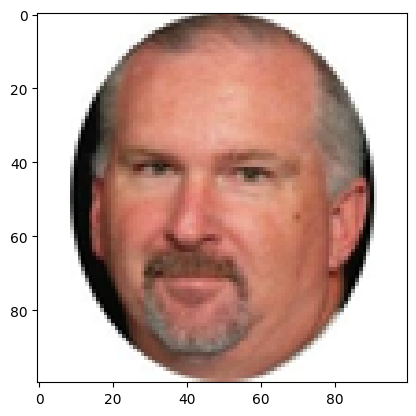

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Your FBP Score is :  2.27


In [23]:
import random 
idx = random.randint(0, len(y_test))
plt.imshow(X_test[idx,:])
plt.show()

y_pred = model.predict(X_test[idx,:].reshape(1,100,100,3))
print("Your FBP Score is : ", round(y_pred[0][0],2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Your FBP Score is :  3.49


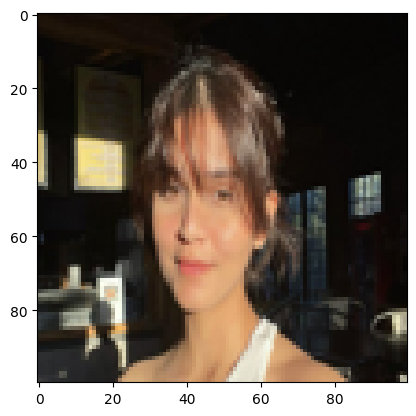

In [24]:
image_dir = "E:\SCUT-benchmark\play_images"
image_data = []
for image_name in os.listdir(image_dir):
    if image_name.endswith(('jpg', 'jpeg', 'png')):
        img_path = os.path.join(image_dir, image_name)
        img = Image.open(img_path)
        img = img.resize((100, 100)) 
        img_array = np.array(img)
        plt.imshow(img_array)
        img_array=img_array/255.0
        flattened = img_array.reshape(-1, 3)
        y_pred = model.predict(flattened.reshape(1,100,100,3))
        print("Your FBP Score is : ", round(y_pred[0][0],2))
    